In [21]:
%pip install LensKit

In [22]:
import surprise
import pandas as pd
data = surprise.Dataset.load_builtin('ml-100k')
ddir = surprise.get_dataset_dir()
r_cols = ['user', 'item', 'rating', 'timestamp']
ratings = pd.read_csv(f'{ddir}/ml-100k/ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

In [23]:
!pip install surprise

In [24]:
ratings.head()

In [25]:
from lenskit.datasets import ML100K
from lenskit import batch, topn, util, topn
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, item_knn as knn
%matplotlib inline


In [26]:
algo_ii = knn.ItemItem(20)
algo_als = als.BiasedMF(50)

In [27]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    recs = batch.recommend(fittable, users, 100)
    recs['Algorithm'] = aname
    return recs

In [28]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))

In [29]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs.head()

In [30]:
test_data = pd.concat(test_data, ignore_index=True)
test_data.head()

In [31]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
results = rla.compute(all_recs, test_data)
results.head()

In [32]:
results.groupby('Algorithm').ndcg.mean()

In [33]:
results.groupby('Algorithm').ndcg.mean().plot.bar()

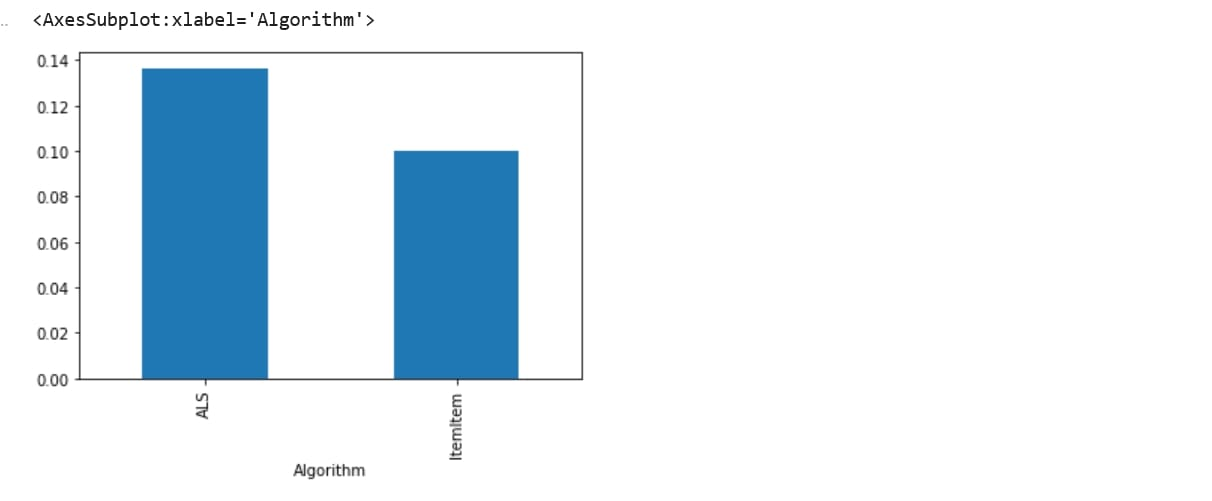